# 1.3 El Método de *Newton-Raphson*

[![Open In Colab](./imagenes/colab-badge.png)](https://colab.research.google.com/github/caramirezs/MetNum_librodigital/blob/master/1_Ecuaciones_de_una_variable/1.3_Metodo_de_Newton-Raphson.ipynb)

In [23]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def graficar(f, x_i, x_f, num=1000):
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: figura y objeto de ejes para la gráfica de la función
    """
    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    # Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
    x = np.linspace(x_i, x_f, num)
    # Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
    # figsize se utiliza para establecer el tamaño de la figura.
    fig, ax = plt.subplots(figsize=(20,8))
    # Grafica la función f(x) en el objeto de ejes creado anteriormente.
    ax.plot(x, f(x))
    # Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # label size de los ejes
    ax.tick_params(labelsize=20, axis='x')
    ax.tick_params(labelsize=20, axis='y')
    # Agrega flechas a los ejes x e y para indicar su dirección.
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    # Devuelve la figura y el objeto de ejes para que puedan ser manipulados y mostrados según se desee.
    return fig, ax

def met_newton_raphson(f, df, p_0, tol=1e-4, n=50, verbose=True):
    """
    Método de Newton-Raphson para encontrar la solución de la ecuación f(x) = 0.
    :param f: Función previamente definida a la que se le intenta encontrar una solución.
    :param p_0: Semilla inicial
    :param tol: Tolerancia para el criterio de parada (por defecto, 1e-4).
    :param n: Número máximo de iteraciones para el criterio de parada (por defecto, 50).
    :param verbose: Si se debe imprimir información de la iteración en cada paso (por defecto, True).

    :return: Solución exacta o aproximada, si existe.
    """
    # Inicializar variables
    i = 1
    if verbose:
        print(f'ite 0: p_0 = {p_0:.5f}')
    # Realizar iteraciones
    while i <= n:

        # Calcular punto de corte de la recta con el eje
        p_i = p_0 - f(p_0)/df(p_0)  # Newton-Rapshon (recta tangente)
        e_abs = abs(p_0 - p_i)

        # Imprimir información
        if verbose:
            print(f'ite {i:<2}: p_{i:<2} = {p_i:.5f}, e_abs: {e_abs:e}')

        # Si encontramos la solución exacta, retornarla
        if f(p_i) == 0:
            print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Actualizar variables
        p_0 = p_i

        # Si la tolerancia se ha alcanzado, retornar solución
        if e_abs < tol:
            print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Incrementar contador
        i += 1

    print('solución no encontrada, iteraciones agotadas')
    return None

## Introducción
El método de Newton-Raphson es rápido y eficiente en la mayoría de los casos. Comienza con una aproximación inicial, también conocida como semilla $p_0$, y se basa en la idea de que la línea tangente a la curva de la función en ese punto se interseca con el eje-$x$ en la ubicación de la raíz de la función. Para determinar la línea tangente, se requiere la derivada de la función $f$. Evaluar $f'(p_0)$ nos da la pendiente de la línea tangente. Al iterar el proceso de encontrar la intersección de la línea tangente con el eje-$x$, nos acercamos a la solución de la ecuación.

Para ilustrar la aplicación del método de Newton-Raphson, consideremos la ecuación no lineal $e^x - 3 \sin(x) - 3x = 0$. Definimos la función $f(x) = e^x - 3 \sin(x) - 3x$ y su derivada $f'(x) = e^x - 3 \cos(x) - 3$. Elegimos una semilla $p_0 = 3.5$, encontramos la recta tangente y la intersección de esta con el eje-$x$ ($p_1$), repetimos el proceso hasta que lleguemos a la solución con la precisión deseada. El siguiente código ilustra este proceso.

(*Nota*: Puede modificar el código probando con otra función, su derivada y modificando la semilla, la toleracia y el máximo número de iteraciones)


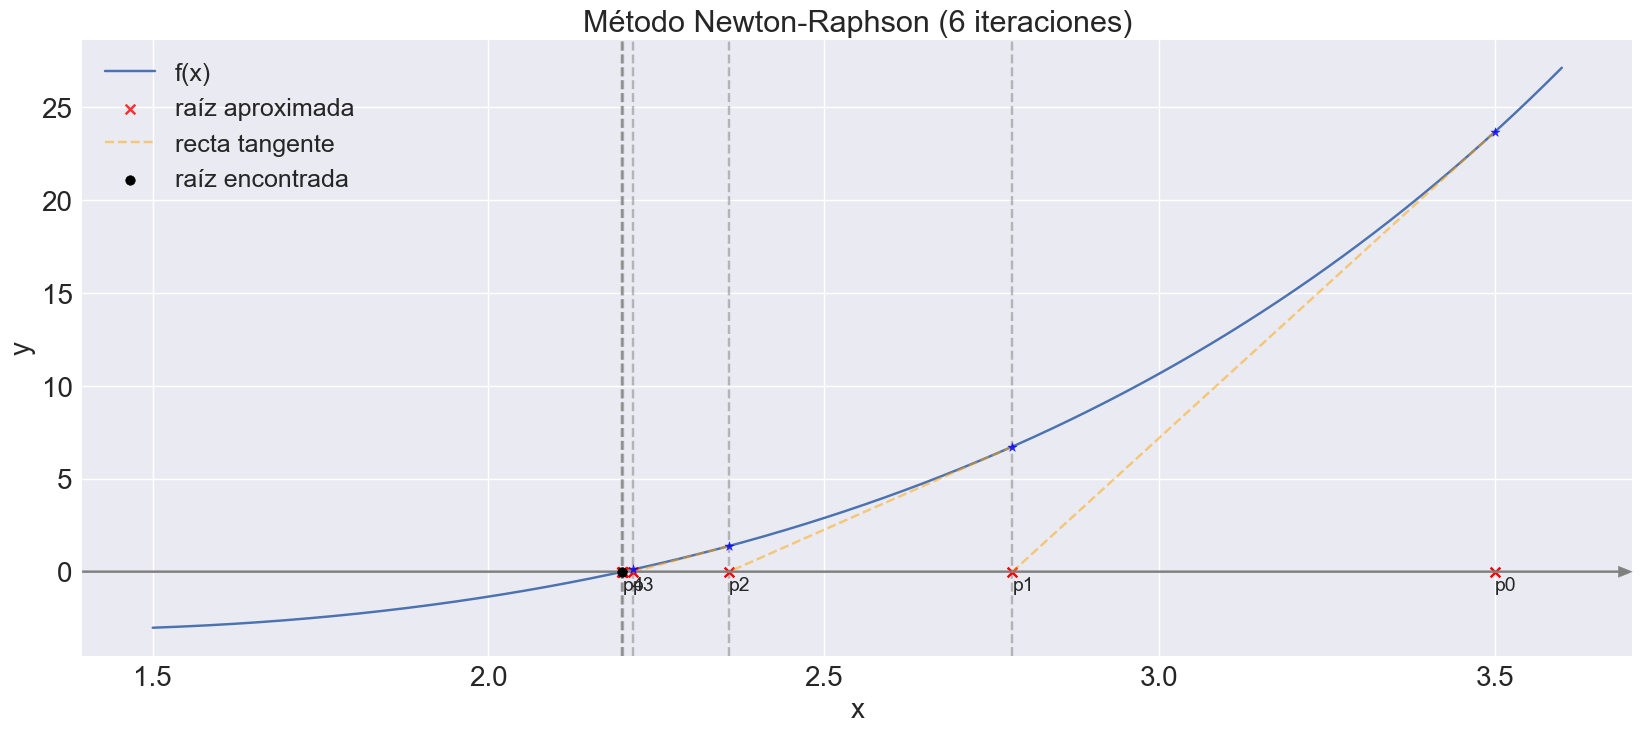

La secuencia para encontrar la solución fue: [3.5, 2.7812, 2.3587, 2.216, 2.2002, 2.2001, 2.2001]


In [80]:
# EJECUTAR ESTA CELDA
# Definir la función
f = lambda x: np.exp(x) - 3*np.sin(x) - 3*x
df = lambda x: np.exp(x) - 3*np.cos(x) - 3
# Definir el intervalo, tolerancia y No. máximo de iteraciones
p_0 = 3.5
tolerancia = 1e-4
max_ite = 100

# Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
x_i, x_f = 1.5, 3.6
x = np.linspace(x_i, x_f, 1000)
# Inicializar la lista de aproximaciones
lista_sol = [p_0]

sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
# Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
# figsize se utiliza para establecer el tamaño de la figura.
fig, ax = plt.subplots(figsize=(20, 8))
# Graficar la función
ax.plot(x, f(x), label='f(x)')
ax.scatter(p_0, f(p_0), color='blue', alpha=0.8, marker='*', zorder=3)
ax.scatter(p_0, 0, color='red', alpha=1, marker='x', zorder=2)
plt.text(p_0, -1, f"p0", fontsize=14)

# Iterar hasta que la tolerancia sea alcanzada o se supere el número máximo de iteraciones
ite= 1
while ite <= max_ite:
    if df(p_0) == 0 or f(p_0) == 0:
        break
    p_i = p_0 - f(p_0)/df(p_0)  # Newton-Rapshon (recta tangente)
    # Agregar p_i a la lista de aproximaciones
    lista_sol.append(round(p_i,4))

    # Graficar la línea vertical en p_i y el punto en la grafica
    ax.axvline(x=p_i, linestyle='--', color='gray', alpha=0.5, zorder=2)
    ax.scatter(p_i, f(p_i), color='blue', alpha=0.8, marker='*', zorder=3)
    ax.scatter(p_i, 0, color='red', alpha=1, marker='x', zorder=2)
    # texto
    if ite <= 4:
        plt.text(p_i, -1, f"p{ite}", fontsize=14)
        plt.plot([p_0, p_i], [f(p_0), 0], '--', color='orange', alpha=0.5, zorder=2)

    if abs(p_i-p_0) < tolerancia:
        break
    p_0 = p_i
    ite += 1

# Graficar el punto final encontrado
ax.scatter(p_i, 0, color='red', alpha=0.8, marker='x', label='raíz aproximada')
plt.plot([p_0, p_i], [f(p_0), 0], '--', color='orange', alpha=0.5, label='recta tangente', zorder=2)
ax.scatter(p_i, f(p_i), color='black', label='raíz encontrada', zorder=3)


### EJES ###
# Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
# label size de los ejes
ax.tick_params(labelsize=20, axis='x')
ax.tick_params(labelsize=20, axis='y')
# Agrega flechas a los ejes x e y para indicar su dirección.
ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)

# Configurar la gráfica
plt.legend(fontsize=18)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title(f'Método Newton-Raphson ({ite} iteraciones)', fontsize=22)
plt.show()
print(f'La secuencia para encontrar la solución fue: {lista_sol}')

El método de Newton-Raphson tiene la ventaja de converger a la solución de forma más rápida que otros métodos como la bisección y la falsa posición. En el ejemplo previo, el método de bisección necesitó 15 iteraciones para alcanzar la solución, mientras que el método de falsa posición tomó 8 iteraciones y el método de Newton-Raphson solo necesitó 6 iteraciones. Además, el método de Newton-Raphson no requiere la determinación de un intervalo $[a,b]$, sino que necesita una semilla $p_0$ para comenzar el proceso iterativo.

## Fórmula
Iniciemos calculando $p_1$ a partir de la semilla $p_0$ para luego pensar en la fórmula general del método
La ecuación de la recta tangente a $f$ que pasa por $(p_0, f(p_0))$ es
$$y = f'(p_0) (x - p_0) + f(p_0)$$
donde $f'(p_0) = m$ es la pendiente de la recta tangente.

para hallar el corte con el eje-$x$ se debe reemplazar $y=0$ y $x=p_1$, así
$$0 = f'(p_0)(p_1-p_0) + f(p_0)$$
al despejar $p_1$ se llega a
$$p_1 = p_0 - \dfrac{f(p_0)}{f'(p_0)}$$

Este proceso se puede generalizar para encontrar $p_{n+1}$ a partir de $p_n$ en el n-ésimo intervalo:
$$p_{n+1} = p_n - \dfrac{f(p_n)}{f'(p_n)}$$


## Método de Newton-Raphson paso a paso:

**Paso 1**: Seleccionar una semilla $p_0$.

**Paso 2**: Calcular el valor donde la recta tangente se interseca con el eje-$x$, la fórmula utilizada es $p_{n} = p_
{n-1} - \dfrac{f(p_{n-1})}{f'(p_{n-1})}$. Tener cuidado con la división por cero, si $f'(p_{n-1}) = 0$ el proceso no puede continuar

**Paso 3**: Comprobar si $f(p_n) = 0$ o si $p_n$ cumple con la tolerancia deseada ($e_a = |p_n - p_{n-1}|$) ; si es así, el método finaliza, de lo contrario continúa.

Se repiten los pasos 2 y 3 hasta alcanzar una tolerancia de error deseada o hasta que se agoten el número de iteraciones permitido.

Cabe destacar que la elección de la semilla inicial puede afectar significativamente la convergencia del método de Newton-Raphson. Si la semilla inicial se encuentra muy lejos de la solución, el método puede no converger o converger a una solución diferente, más adelante veremos algunos ejemplos de esta situación. En la práctica, se pueden utilizar métodos numéricos adicionales para encontrar una semilla inicial adecuada. También es importante mencionar que el método de Newton-Raphson puede ser afectado por la estabilidad numérica, especialmente en casos donde la derivada se acerca a cero. En estos casos, se pueden utilizar variaciones del método de Newton-Raphson, como el método de la secante o el método de Newton modificado, para mejorar la estabilidad y la convergencia del método.

## Ejemplos
### Ejemplo práctico 1: Resolución de Ecuación no Lineal mediante el método de Newton-Raphson

Resolver la ecuación $e^{2x} - \cos(2 \pi x) = 5$ con una tolerancia de $10^{-3}$ utilizando el método de Newton-Raphson.

Primero, se establece la función $f$ tal que $f(x) =0$. Se debe encontrar la derivada de la función $f(x) = e^{2x} - \cos(2 \pi x) -5 $, la cual es $f'(x) = 2e^{2x} + 2\pi\sin(2\pi x)$. El siguiente paso es escoger una semilla inicial $p_0$. En este caso, podemos elegir $p_0 = 0$ como una opción razonable, ya que la gráfica de la función sugiere que la solución está cerca de ese valor

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

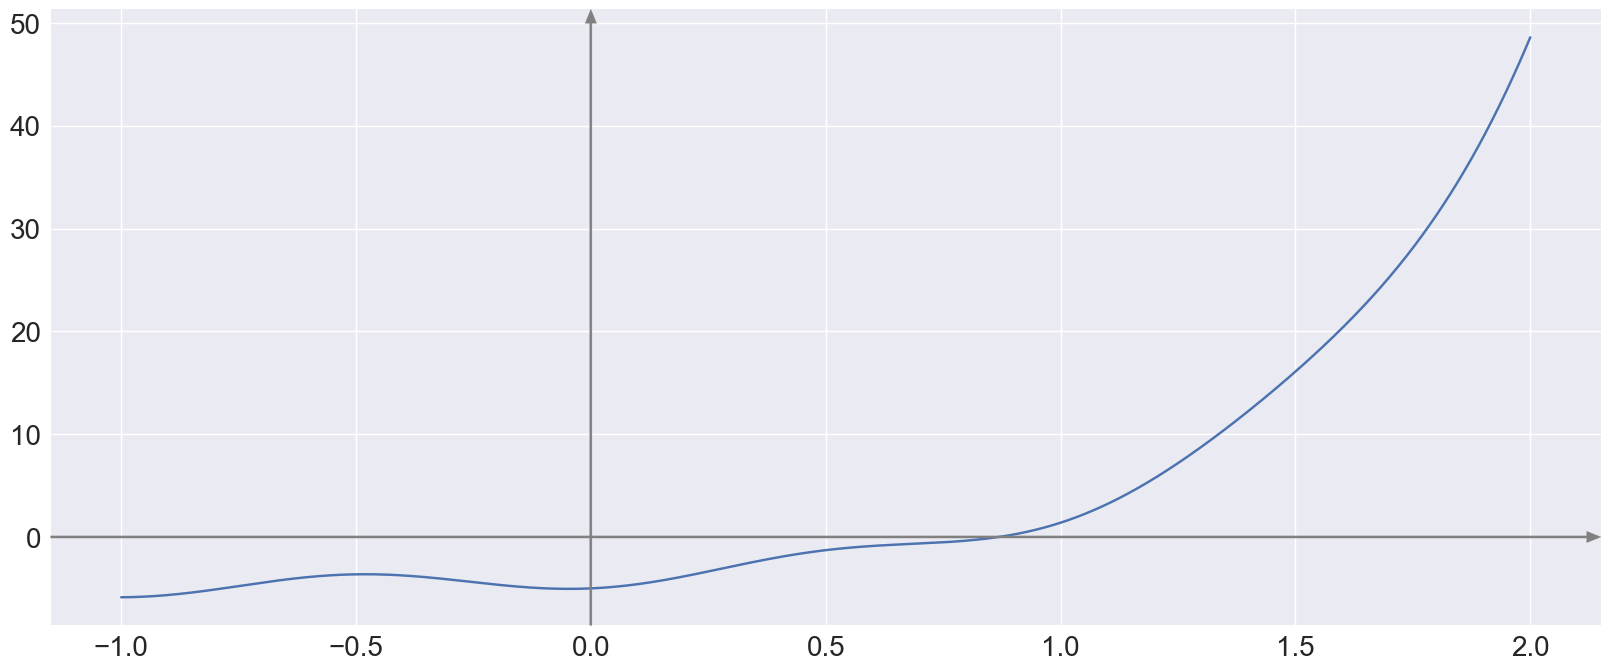

In [32]:
f = lambda x: np.exp(2*x) - np.cos(2*np.pi*x) - 5
df = lambda x: 2*np.exp(2*x) + 2*np.pi*np.sin(2*np.pi*x)

graficar(f, -1 , 2)

Luego, se pueden aplicar las iteraciones del método de Newton-Raphson utilizando la fórmula $p_{n+1} = p_n - \frac{f(p_n)}{f'(p_n)}$. En este caso, las iteraciones se detienen cuando la diferencia entre dos iteraciones consecutivas es menor a la tolerancia deseada, es decir, cuando $|p_{n+1} - p_n| < 10^{-3}$.

$$p_1 = p_0 - \frac{f(p_0)}{f'(p_0)} = 0 - \frac{f(0)}{f'(0)} = 2.5, \ \ \  e_{abs} = |p_1 - p_0| = 2.5$$
$$p_2 = p_1 - \frac{f(p_1)}{f'(p_1)} = 2.5 - \frac{f(2.5)}{f'(2.5)} = 2.01348, \ \ \  e_{abs} = |p_2 - p_1| = 0.48652$$
$$p_3 = p_2 - \frac{f(p_2)}{f'(p_2)} = 2.01348 - \frac{f(1.569048)}{f'(1.569048)} = 1.56903, \ \ \  e_{abs} = |p_3 - p_4| = 0.444441$$
$$p_4 = p_3 - \frac{f(p_3)}{f'(p_3)} = 1.56903 - \frac{f(1.56903)}{f'(1.56903)} = 1.1328, \ \ \  e_{abs} = |p_4 - p_3| = 0.436238$$
$$p_5 = p_4 - \frac{f(p_4)}{f'(p_4)} = 1.1328 - \frac{f(1.1328)}{f'(1.1328)} = 0.96709, \ \ \  e_{abs} = |p_5 - p_4| = 0.16571$$
$$p_6 = p_5 - \frac{f(p_5)}{f'(p_5)} = 0.96709 - \frac{f(0.96709)}{f'(0.96709)} = 0.892196, \ \ \  e_{abs} = |p_6 - p_5| = 0.0748934$$
$$p_7 = p_6 - \frac{f(p_6)}{f'(p_6)} = 0.892196 - \frac{f(0.892196)}{f'(0.892196)} = 0.870034, \ \ \  e_{abs} = |p_7 - p_6| = 0.0221624$$
$$p_8 = p_7 - \frac{f(p_7)}{f'(p_7)} = 0.870034 - \frac{f(0.870034)}{f'(0.870034)} = 0.868123, \ \ \  e_{abs} = |p_8 - p_7| = 0.0019111$$
$$p_8 = p_7 - \frac{f(p_7)}{f'(p_7)} = 0.868123 - \frac{f(0.868123)}{f'(0.868123)} = 0.868109, \ \ \  e_{abs} = |p_8 - p_7| = 0.0000134971$$


Después de aplicar varias nueve iteraciones, se obtiene una solución de aproximadamente $p \approx 0.868109$. Se puede verificar que esta solución es correcta al sustituirla en la ecuación original y verificar que el resultado es cercano a 5.

$$e^{2(0.868109)} - \cos(2 \pi (0.868109)) \approx 5$$

Podemos verificar el razonamiento anterior utilizando la función `met_newton_raphson(f, df, 0, tol=1e-3)` para encontrar la solución con la precisión deseada y ver cada paso de la iteración:

In [36]:
met_newton_raphson(f, df, 0, tol=1e-3)

ite 0: p_0 = 0.00000
ite 1 : p_1  = 2.50000, e_abs: 2.500000e+00
ite 2 : p_2  = 2.01348, e_abs: 4.865241e-01
ite 3 : p_3  = 1.56903, e_abs: 4.444409e-01
ite 4 : p_4  = 1.13280, e_abs: 4.362379e-01
ite 5 : p_5  = 0.96709, e_abs: 1.657089e-01
ite 6 : p_6  = 0.89220, e_abs: 7.489259e-02
ite 7 : p_7  = 0.87003, e_abs: 2.216196e-02
ite 8 : p_8  = 0.86812, e_abs: 1.911022e-03
ite 9 : p_9  = 0.86811, e_abs: 1.349599e-05
>>> Solución encontrada después de 9 iteraciones: x->0.868109147034626


0.8681091470346265

Cabe destacar que la elección de la semilla inicial puede afectar la convergencia del método de Newton-Raphson. Si se elige una semilla que está muy lejos de la solución, es posible que el método no converja o converja a una solución diferente. En el caso del ejemplo anterior, la elección de $p_0=0$ no es eficiente, ya que la derivada en este punto es cercana a cero, lo que se refleja en una recta con pequeña inclinación. Podemos ver la secuencia de las iteraciones modificando el código en donde se explora el método:

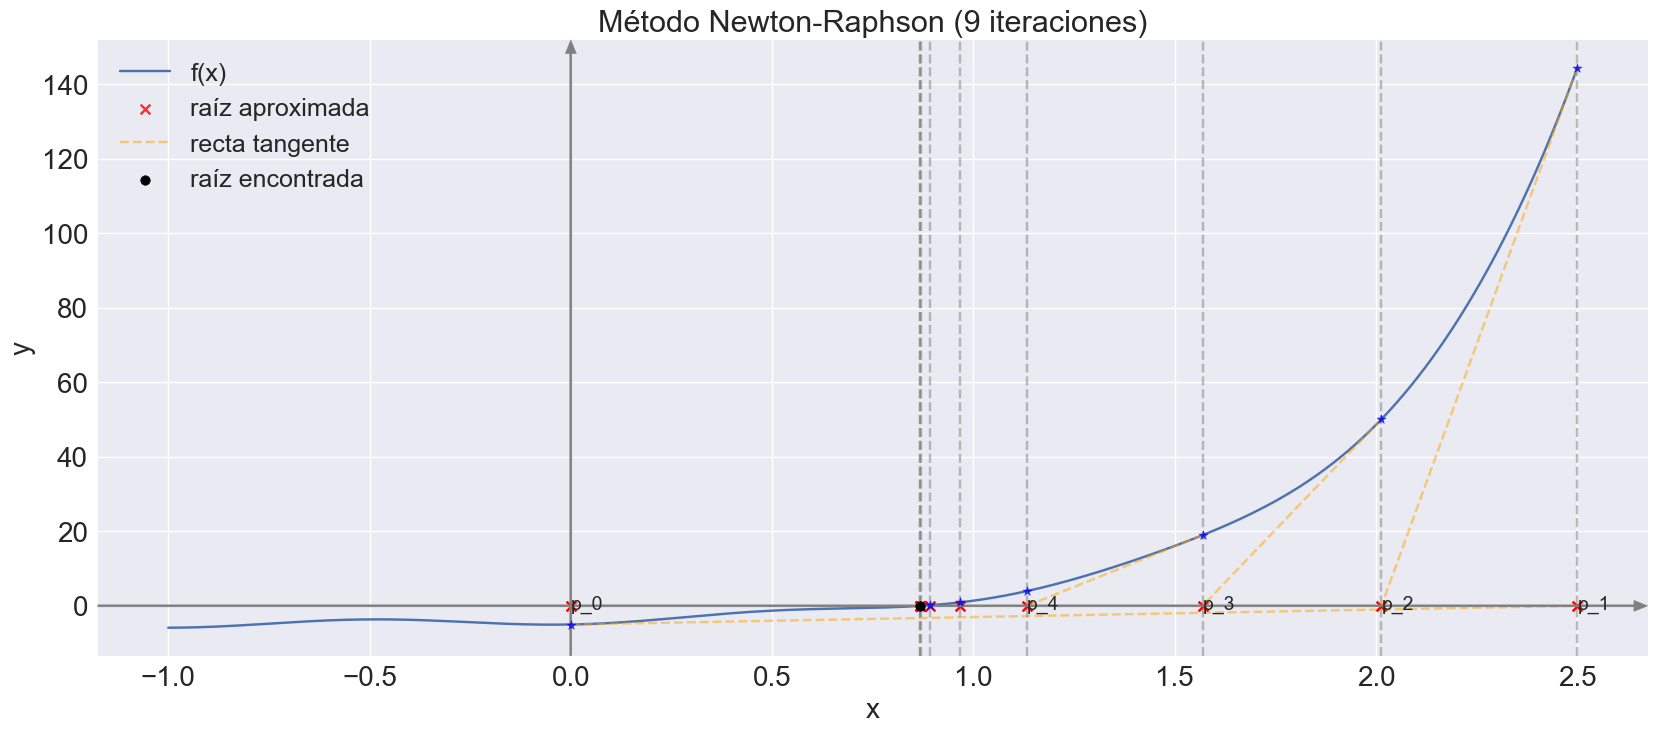

La secuencia para encontrar la solución fue: [0, 2.5, 2.0135, 1.569, 1.1328, 0.9671, 0.8922, 0.87, 0.8681, 0.8681]


In [81]:
# EJECUTAR ESTA CELDA
# Definir la función
f = lambda x: np.exp(2*x) - np.cos(2*np.pi*x) - 5
df = lambda x: 2*np.exp(2*x) + 2*np.pi*np.sin(2*np.pi*x)
# Definir el intervalo, tolerancia y No. máximo de iteraciones
p_0 = 0
tolerancia = 1e-3
max_ite = 100

# Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
x_i, x_f = -1, 2.5
x = np.linspace(x_i, x_f, 1000)
# Inicializar la lista de aproximaciones
lista_sol = [p_0]

sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
# Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
# figsize se utiliza para establecer el tamaño de la figura.
fig, ax = plt.subplots(figsize=(20, 8))
# Graficar la función
ax.plot(x, f(x), label='f(x)')
ax.scatter(p_0, f(p_0), color='blue', alpha=0.8, marker='*', zorder=3)
ax.scatter(p_0, 0, color='red', alpha=1, marker='x', zorder=2)
plt.text(p_0, -1, f"p_0", fontsize=14)

# Iterar hasta que la tolerancia sea alcanzada o se supere el número máximo de iteraciones
ite= 1
while ite <= max_ite:
    if df(p_0) == 0 or f(p_0) == 0:
        break
    p_i = p_0 - f(p_0)/df(p_0)  # Newton-Rapshon (recta tangente)
    # Agregar p_i a la lista de aproximaciones
    lista_sol.append(round(p_i,4))

    # Graficar la línea vertical en p_i y el punto en la grafica
    ax.axvline(x=p_i, linestyle='--', color='gray', alpha=0.5, zorder=2)
    ax.scatter(p_i, f(p_i), color='blue', alpha=0.8, marker='*', zorder=3)
    ax.scatter(p_i, 0, color='red', alpha=1, marker='x', zorder=2)
    # texto
    if ite <= 4:
        plt.text(p_i, -1, f"p_{ite}", fontsize=14)
        plt.plot([p_0, p_i], [f(p_0), 0], '--', color='orange', alpha=0.5, zorder=2)

    if abs(p_i-p_0) < tolerancia:
        break
    p_0 = p_i
    ite += 1

# Graficar el punto final encontrado
ax.scatter(p_i, 0, color='red', alpha=0.8, marker='x', label='raíz aproximada')
plt.plot([p_0, p_i], [f(p_0), 0], '--', color='orange', alpha=0.5, label='recta tangente', zorder=2)
ax.scatter(p_i, f(p_i), color='black', label='raíz encontrada', zorder=3)


### EJES ###
# Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
# label size de los ejes
ax.tick_params(labelsize=20, axis='x')
ax.tick_params(labelsize=20, axis='y')
# Agrega flechas a los ejes x e y para indicar su dirección.
ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)

# Configurar la gráfica
plt.legend(fontsize=18)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title(f'Método Newton-Raphson ({ite} iteraciones)', fontsize=22)
plt.show()
print(f'La secuencia para encontrar la solución fue: {lista_sol}')

Miremos lo que sucede al cambiar ligeramente la semilla, de $p_0 = 0$ a $p_0 = -0.05$, al aplicar el método vemos que el número de iteraciones aumenta a 622.

In [53]:
met_newton_raphson(f, df, -0.05, tol=1e-3, n=700)

ite 0: p_0 = -0.05000
ite 1 : p_1  = -38.29742, e_abs: 3.824742e+01
ite 2 : p_2  = -39.08099, e_abs: 7.835761e-01
ite 3 : p_3  = -40.99956, e_abs: 1.918570e+00
ite 4 : p_4  = 307.73977, e_abs: 3.487393e+02
ite 5 : p_5  = 307.23977, e_abs: 5.000000e-01
ite 6 : p_6  = 306.73977, e_abs: 5.000000e-01
ite 7 : p_7  = 306.23977, e_abs: 5.000000e-01
ite 8 : p_8  = 305.73977, e_abs: 5.000000e-01
ite 9 : p_9  = 305.23977, e_abs: 5.000000e-01
ite 10: p_10 = 304.73977, e_abs: 5.000000e-01
ite 11: p_11 = 304.23977, e_abs: 5.000000e-01
ite 12: p_12 = 303.73977, e_abs: 5.000000e-01
ite 13: p_13 = 303.23977, e_abs: 5.000000e-01
ite 14: p_14 = 302.73977, e_abs: 5.000000e-01
ite 15: p_15 = 302.23977, e_abs: 5.000000e-01
ite 16: p_16 = 301.73977, e_abs: 5.000000e-01
ite 17: p_17 = 301.23977, e_abs: 5.000000e-01
ite 18: p_18 = 300.73977, e_abs: 5.000000e-01
ite 19: p_19 = 300.23977, e_abs: 5.000000e-01
ite 20: p_20 = 299.73977, e_abs: 5.000000e-01
ite 21: p_21 = 299.23977, e_abs: 5.000000e-01
ite 22: p_22

0.8681095217092897

En cambio, si utilizamos otra semilla, como por ejemplo $p_0=2$, el método converge en solo 7 iteraciones

In [56]:
met_newton_raphson(f, df, 2, tol=1e-3)

ite 0: p_0 = 2.00000
ite 1 : p_1  = 1.55495, e_abs: 4.450531e-01
ite 2 : p_2  = 1.12509, e_abs: 4.298584e-01
ite 3 : p_3  = 0.96360, e_abs: 1.614871e-01
ite 4 : p_4  = 0.89083, e_abs: 7.277522e-02
ite 5 : p_5  = 0.86983, e_abs: 2.099532e-02
ite 6 : p_6  = 0.86812, e_abs: 1.710992e-03
ite 7 : p_7  = 0.86811, e_abs: 1.081205e-05
>>> Solución encontrada después de 7 iteraciones: x->0.868109146794911


0.8681091467949111

## Desventajas del método de Newton-Raphson
Algunas de las desventajas del método de Newton-Rapshon incluyen:

1. Sensibilidad a la elección del punto de inicio: El método de Newton puede fallar o converger a una raíz incorrecta si el punto de inicio elegido está demasiado lejos de la raíz real. En algunos casos, puede ser difícil determinar un punto de inicio adecuado.
2. Requiere el cálculo de la derivada de la función: El método de Newton requiere el cálculo de la derivada de la función, lo que puede ser un proceso tedioso y propenso a errores en algunos casos.
3. No siempre converge: En algunos casos, el método de Newton puede no converger a una raíz real o puede converger a una raíz incorrecta. Es importante verificar la convergencia del método y tomar medidas para corregir los problemas de convergencia.
4. Puede requerir mucho tiempo de cálculo: En algunos casos, el método de Newton puede requerir un gran número de iteraciones para converger a una raíz real, lo que puede ser costoso computacionalmente y llevar mucho tiempo.

Las siguientes gráficas muestran algunas de las desventajas del método, donde las aproximaciones no convergen a la solución deseada
<img src="./imagenes/nosol_met_NR.png" alt="figura1" width="1000">


## Conclusiones
Como vimos, el Método de Newton-Raphson es un método numérico iterativo que converge rápidamente hacia la solución de una ecuación no lineal. En cada iteración, este método utiliza la tangente de la función en la aproximación actual de la raíz para encontrar una mejor aproximación. Esto lo hace especialmente útil en casos donde la función es no lineal y tiene una curva suave y una derivada sencilla, ya que su convergencia es mucho más rápida que los métodos anteriormente estudiandos.

Una ventaja adicional del Método de Newton-Raphson es que puede ser utilizado para encontrar múltiples raíces en una misma función, siempre y cuando se conozca una aproximación inicial cerca de cada raíz. Sin embargo, este método tiene algunas limitaciones. En primer lugar, su convergencia no está garantizada en todos los casos y puede fallar si la aproximación inicial está muy lejos de la raíz de la ecuación.